In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install transformers

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/drive/MyDrive/dataset/WELFake_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [8]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [9]:
df.reset_index(inplace=True)

In [10]:
df=df.drop(["index","Unnamed: 0"],axis=1)

In [11]:
df["message"]=df["title"]+df["text"]

In [12]:
df=df.drop(["title","text"],axis=1)

In [13]:
df.shape

(71537, 2)

In [14]:
df["label"].value_counts(normalize=True)*100

,proportion
label,
1,51.035129
0,48.964871


In [15]:
from nltk.corpus import stopwords
import nltk
import re


In [16]:
y=df["label"].values

In [17]:
x=[]
for i in range(len(df["message"])):
  review=re.sub("[^a-zA-Z]"," ",df["message"][i])
  review=review.lower()
  x.append(review)
  if i%1000==0:
    print("number of words completed:",i)
  elif i==len(df["message"])-1:
    print("number of words completed:",i+1)

number of words completed: 0
number of words completed: 1000
number of words completed: 2000
number of words completed: 3000
number of words completed: 4000
number of words completed: 5000
number of words completed: 6000
number of words completed: 7000
number of words completed: 8000
number of words completed: 9000
number of words completed: 10000
number of words completed: 11000
number of words completed: 12000
number of words completed: 13000
number of words completed: 14000
number of words completed: 15000
number of words completed: 16000
number of words completed: 17000
number of words completed: 18000
number of words completed: 19000
number of words completed: 20000
number of words completed: 21000
number of words completed: 22000
number of words completed: 23000
number of words completed: 24000
number of words completed: 25000
number of words completed: 26000
number of words completed: 27000
number of words completed: 28000
number of words completed: 29000
number of words complet

In [18]:
from transformers import DistilBertTokenizerFast,DistilBertForSequenceClassification
import torch
from torch.utils.data import Dataset


In [19]:
tokenizer=DistilBertTokenizerFast.from_pretrained("Distilbert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

In [21]:
x_train[0]

'watch  jailed palestinian terrorist and hunger strike leader caught on tape eatingtel aviv      the israeli prison service released a video on sunday that appears to show palestinian terrorist and wannabe politician marwan barghouti secretly eating a candy bar and other food in the bathroom of his cell while purportedly leading a hunger strike   barghouti  who is serving five life sentences  was filmed eating on two separate occasions  the first time on april    shows him unwrapping cookies from a hiding place in the bathroom and then eating it while sitting on the toilet  he then tries to conceal the fact by washing his hands and face and hiding the wrapper  on the second occasion on may    barghouti is filmed eating a candy bar and salt   public security minister gilad erdan slammed barghouti as a  murderer and a hypocrite  for eating while leading a hunger strike   as i said from the very beginning  this hunger strike was never about the conditions of the convicted terrorists  whic

In [22]:
train_encoding=tokenizer(x_train,truncation=True,padding=True)
test_encoding=tokenizer(x_test,truncation=True,padding=True)

In [35]:
class NewDataset(Dataset):
  def __init__(self,encodings,labels):
    self.encodings=encodings
    self.labels=labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self,idx):
    items={key:torch.tensor(val[idx]) for key,val in self.encodings.items()}
    items["labels"]=torch.tensor(self.labels[idx])
    return items

In [36]:
train_datset=NewDataset(train_encoding,y_train)
test_dataset=NewDataset(test_encoding,y_test)

In [37]:
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def compute_metrics(eval_pred):
  logits,labels=eval_pred
  pred=np.argmax(logits,axis=1)
  return {
      "accuracy": accuracy_score(labels,pred),
      "precision_score": precision_score(labels,pred),
      "recall_score": recall_score(labels,pred),
      "f1_score": f1_score(labels,pred)
  }

In [38]:
from transformers import DistilBertForSequenceClassification,Trainer,TrainingArguments

model=DistilBertForSequenceClassification.from_pretrained(
    "Distilbert-base-uncased",
    num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at Distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir="./logs"
)

In [40]:
trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_datset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision Score,Recall Score,F1 Score
1,0.127100,0.076388,0.980570,0.985217,0.976582,0.980880
2,0.036500,0.070832,0.985602,0.984302,0.987538,0.985917


TrainOutput(global_step=14308, training_loss=0.08182775397723302, metrics={'train_runtime': 5930.6566, 'train_samples_per_second': 19.299, 'train_steps_per_second': 2.413, 'total_flos': 1.5161953515368448e+16, 'train_loss': 0.08182775397723302, 'epoch': 2.0})

In [41]:
 trainer.evaluate(test_dataset)

{'eval_loss': 0.07083157449960709,
 'eval_accuracy': 0.985602460162147,
 'eval_precision_score': 0.9843024843024843,
 'eval_recall_score': 0.9875376609148179,
 'eval_f1_score': 0.9859174186491659,
 'eval_runtime': 204.8155,
 'eval_samples_per_second': 69.858,
 'eval_steps_per_second': 4.37,
 'epoch': 2.0}

In [42]:
output=trainer.predict(test_dataset)[1]

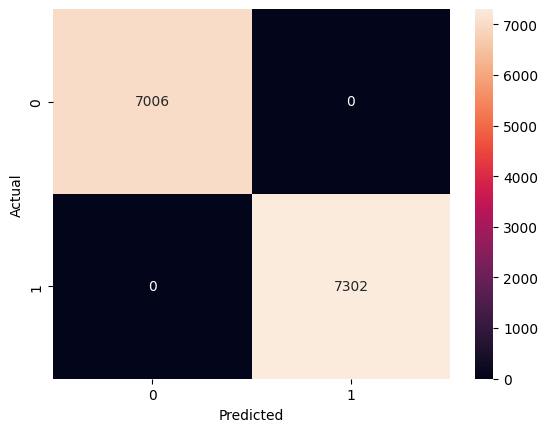

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,output)

sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [47]:
trainer.save_model("fake_classifier")


In [48]:
tokenizer.save_pretrained("fake_classifier")

('fake_classifier/tokenizer_config.json',
 'fake_classifier/special_tokens_map.json',
 'fake_classifier/vocab.txt',
 'fake_classifier/added_tokens.json',
 'fake_classifier/tokenizer.json')

In [50]:
!zip -r fake_classifier.zip fake_classifier

  adding: fake_classifier/ (stored 0%)
  adding: fake_classifier/vocab.txt (deflated 53%)
  adding: fake_classifier/special_tokens_map.json (deflated 42%)
  adding: fake_classifier/model.safetensors (deflated 8%)
  adding: fake_classifier/config.json (deflated 45%)
  adding: fake_classifier/tokenizer.json (deflated 71%)
  adding: fake_classifier/training_args.bin (deflated 53%)
  adding: fake_classifier/tokenizer_config.json (deflated 75%)


In [51]:
from google.colab import files
files.download('fake_classifier.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>